<a href="https://colab.research.google.com/github/Nastarii/-Weight-Estimation-with-Anthropometrics/blob/main/Konker_C%C3%B3pia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXECUTE O CÓDIGO UM POR VEZ, CERTIFICANDO-SE QUE OS DADOS INFORMADOS ESTEJAM CORRETOS (LETRAS MAIUSCULAS E MINÚSCULAS E ESPAÇOS FAZEM TODA DIFERENÇA):


________________________________________________________________________________________________________________________________________________________________
Vamos iniciar nosso notebook chamando todas as bibliotecas que usaremos. Nessa etapa, nada precisa ser modificado:

In [ ]:
!pip install arrow bokeh paho.mqtt
from oauthlib.oauth2 import BackendApplicationClient
from requests_oauthlib import OAuth2Session
import pprint
import numpy as np
import arrow
import requests                                                                                                                                                                                 
import json                                                                                                                                                                                     
from threading import Timer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 KB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for paho.mqtt: filename=paho_mqtt-1.6.1-py3-none-any.whl size=62132 sha256=4a986d66bea0879b5f7a6ff71a92b682cd4b165ccedec59b29fe44f82e8a0332
  Stored in directory: /root/.cache/pip/wheels/6a/48/01/c895c027e9b9367ec5470fbf371ee56e795a49ac6a19aa4c9f
Successfully built paho.mqtt


________________________________________________________________________________________________________________________________________________________________
O próximo passo é definir os endereços que serão usados para consultar e enviar os dados. Nessa etapa ainda não é necessário fazer modificações:

In [ ]:
#Url de publicacao dos dados
pub_url = 'https://data.demo.konkerlabs.net/pub/'
#Url da API
base_api = 'https://api.demo.konkerlabs.net'
#Application padrão
application = 'default'

________________________________________________________________________________________________________________________________________________________________
Agora vamos colocar em duas variáveis o seu usuário e senha da plataforma:

In [ ]:
# Acesso
username = 'ro_smartcampus@konkerlabs.com'
password = 'qCa13ZTdADmV'

## Usando a API da Konker para obter os dados e analisa-los localmente
Para iniciar esse trabalho, vamos primeiro conectar na API da Konker. A API usa OAuth2, então primeiro vamos obter as credenciais.

In [ ]:
client = BackendApplicationClient(client_id=username)
oauth = OAuth2Session(client=client)
token = oauth.fetch_token(token_url='{}/v1/oauth/token'.format(base_api),
                                       client_id=username,
                                       client_secret=password)

________________________________________________________________________________________________________________________________________________________________
Ótimo! Agora nos podemos começar a usar a API. Caso você queira mais detalhes de sua utilização, pode encontrar documentação em: https://api.demo.konkerlabs.net .

Vamos começar listando os dispositivos registrados no seu usuário.

Copie a guid do dispositivo escolhido (localizado no final da respectiva linha):

________________________________________________________________________________________________________________________________________________________________
Agora vamos usar a API para pegar os dados enviados pelo dispositivo.

É necessário saber o nome do canal onde estão os dados que você quer encontrar. Para isso, é preciso fazer login na sua conta Koner e consultar manualmente esses nomes. Em seguida, cole no espaço destinado abaixo:

Edite o dia que iniciará a checagem dos dados em:
dt_start = dt_start.shift(days=- #DIGITE AQUI#).

Depois disso, informe a quantidade limite de dados a serem registrados:
timestamp:>{}&sort=oldest&limit= #INFORME AQUI!#



In [ ]:
import pandas as pd
import numpy as np

class Device():
    
    devices_ = oauth.get("https://api.demo.konkerlabs.net/v1/{}/devices/".format(application)).json()['result']
    df = pd.DataFrame.from_dict(devices_)

    def __init__(self, name, canal, dias=10, limite=5000):
        self.properties = self.df.loc[self.df['name'] == name] # Localiza o dispositivo
        print(self.properties)
        assert len(self.properties) == 1, 'Nenhum ou mais de um dispositivo Encontrado'
        
        self.dt_start = arrow.utcnow().to('America/Sao_Paulo').floor('day') # TimeStamp confs
        self.dt_start = self.dt_start.shift(days=-dias) #colocar dia
        self.guid_term = self.properties.guid.values[0] # Recebe o guid do dispositivo

        self.stats = oauth.get("https://api.demo.konkerlabs.net/v1/{}/incomingEvents?q=device:{} channel:{} timestamp:>{}&sort=oldest&limit={}".
                        format(application,self.guid_term,canal,self.dt_start.isoformat(),limite)).json()['result']
        print(self.stats)
        print(f'-- Dispositivo {name} --- \nInfo:\n{self.properties} \nQuantidade de dados:{len(self.stats)}')
    
    def __call__(self,payloads:list = []):
        if payloads:
            return pd.json_normalize(self.stats).set_index('timestamp')[payloads]
        else:
            return pd.json_normalize(self.stats).set_index('timestamp')

In [ ]:
Esp04Gases = Device('ESP32_01-FT', 'Temperatura_e_Umidade', dias=7, limite=7000)

             id         name                     description  \
42  ESP32_01-FT  ESP32_01-FT  ESP32_01 - Lab de Materiais FT   

            locationName deviceModelName  active  debug tags  \
42  laboratoriomateriais         default    True  False   []   

                                    guid  
42  851eff2e-fbba-4862-8142-0c50917d4c15  
[{'timestamp': '2023-01-05T03:00:34.383Z', 'ingestedTimestamp': '2023-01-05T03:00:34.383Z', 'incoming': {'deviceGuid': '851eff2e-fbba-4862-8142-0c50917d4c15', 'channel': 'Temperatura_e_Umidade'}, 'payload': {'Temp_Maq_Ensaio': 26.29999924, 'Umid_Maq_Ensaio': 69, 'Temp_Cam_Umida': 27.20000076, 'Umid_Cam_Umida': 79.09999847, 'Temp_PC_Hidr': 25.89999962, 'Umid_PC_Hidr': 68.40000153}}, {'timestamp': '2023-01-05T03:01:32.189Z', 'ingestedTimestamp': '2023-01-05T03:01:32.189Z', 'incoming': {'deviceGuid': '851eff2e-fbba-4862-8142-0c50917d4c15', 'channel': 'Temperatura_e_Umidade'}, 'payload': {'Temp_Maq_Ensaio': 26.20000076, 'Umid_Maq_Ensaio': 68.09999847, 

________________________________________________________________________________________________________________________________________________________________
Caso tudo tenha funcionado como esperado, você deve estar vendo seus dados logo acima. Para facilitar a visualização e análise dos dados, podemos transformar em um formato tabular com o Pandas.

Execute o código abaixo para obter uma tabela contendo todos os dados registrados nesse intervalo de tempo:

________________________________________________________________________________________________________________________________________________________________
Ótimo! Agora os dados estão em um formato mais fácil de ler. Mas podemos também fazer um gráfico bem simples!

Execute o gráfico abaixo para a plotagem do gráfico. É necessário informar o payload escolhido. Você também pode editar as dimensões da plotage na parte figsize=(X,Y):

In [ ]:
Esp04Gases().to_csv('ESP32_0!-FT_Temperatura_e_umidade.csv')

2023-01-01T03:00:12.850Z - 2023-01-06T11:36:12.201Z


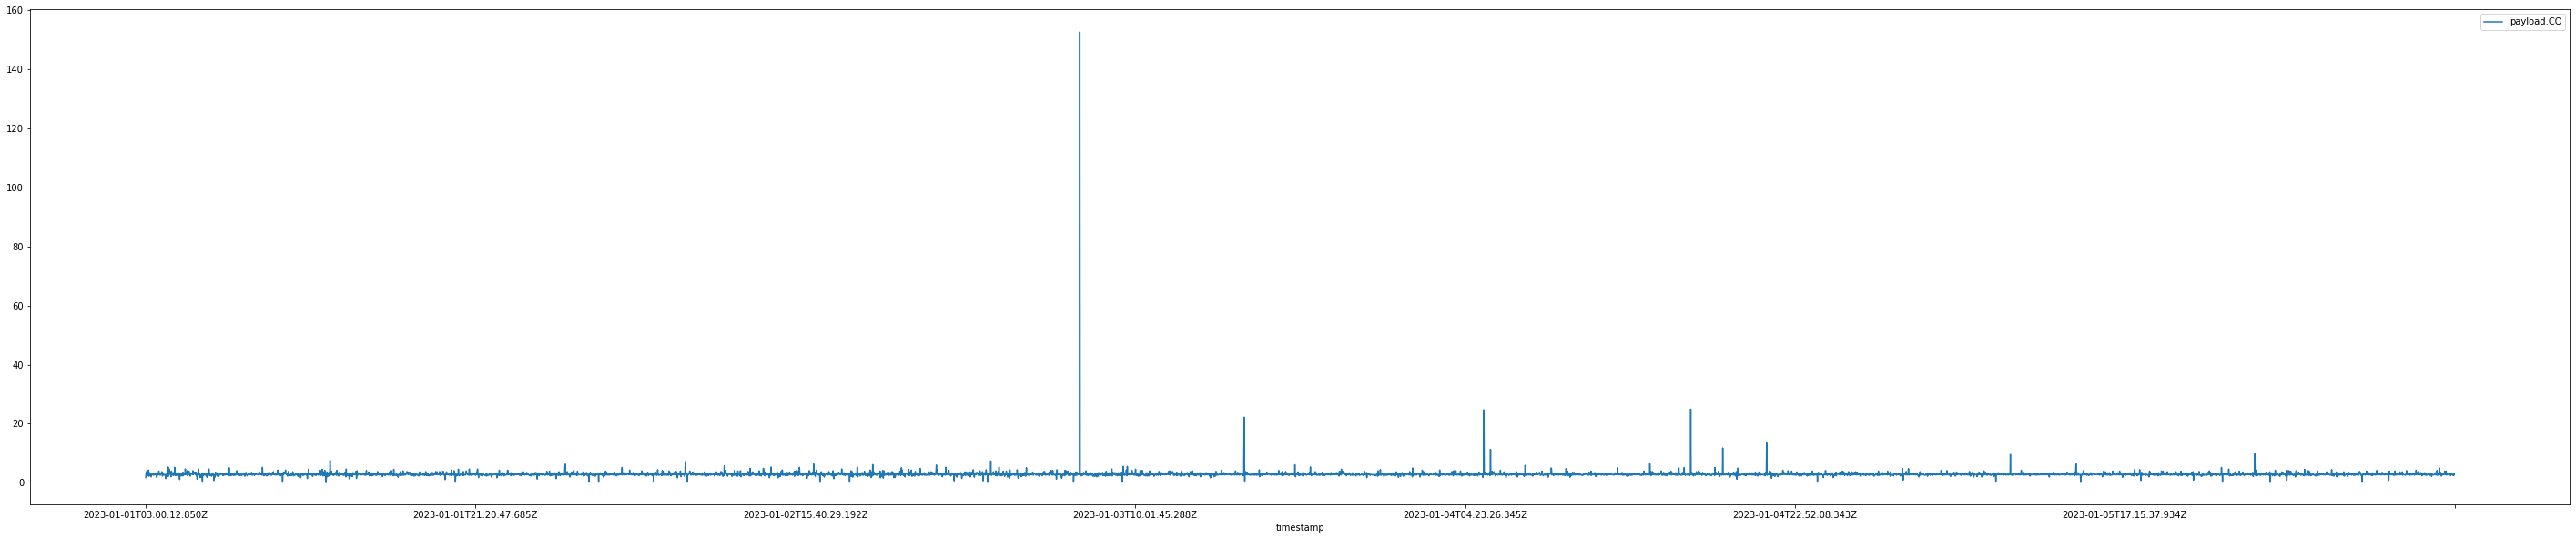

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

payload = ['payload.CO']
Esp04Gases(payload).plot(figsize=(50,10)) #colocar metrica
print(Esp04Gases(payload).index[0], '-',Esp04Gases(payload).index[-1])

In [ ]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
import pandas as pd
output_notebook()

________________________________________________________________________________________________________________________________________________________________
Vamos ver agora como se comportam os dois clusters encontrados em um gráfico. Edite o payload se necessário:

Nota: Nessa segunda versão do Notebook estou usando a biblioteca Bokeh para tentar evitar o gargalo em processamento gerado pelo Matplotlib na sala de aula. Caso você ainda encontre problemas em gerar o gráfico, por favor me envie um email em luis@konkerlabs.com

## Elliptic Envelope Outliters detections

In [ ]:
p = figure(plot_width=820, plot_height=400, x_axis_type="datetime",
           title=' '.join(payload),
           x_axis_label='Tempo', 
           y_axis_label=Esp04Gases('incoming.channel').values[0])

p.title.text_font_size = '16pt'
p.xaxis.axis_label_text_font_size = "14pt"
p.yaxis.axis_label_text_font_size = "14pt"

X = np.array(pd.to_datetime(Esp04Gases().index))
y = np.hstack(np.array(Esp04Gases(payload)))

# add a line renderer
p.scatter(X, y)

show(p) # show the results

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.covariance import EllipticEnvelope

X_train, X_test, y_train, y_test = train_test_split(range(len(X)), y, test_size=0.33, random_state=42, shuffle=False)

In [ ]:
train = np.array([[x,y] for x,y in zip(X_train,y_train)])
test = np.array([[x,y] for x,y in zip(X_test,y_test)])

In [ ]:
cov = EllipticEnvelope(random_state=0).fit(train)
predictions = cov.predict(test)

In [ ]:
p = figure(plot_width=820, plot_height=400, x_axis_type="datetime",
           title= f"EllipticEnvelope Outliers Detection para {' '.join(payload)}",
           x_axis_label='Tempo', 
           y_axis_label=Esp04Gases('incoming.channel').values[0])

time_train = np.array([X[int(ind)] for ind in train[:,0]])
time_out = np.array([X[int(ind)] for i, ind in enumerate(test[:,0]) if predictions[i] == -1])
time_in = np.array([X[int(ind)] for i, ind in enumerate(test[:,0]) if predictions[i] == 1])

y_out = np.array([y for i, y in enumerate(y_test) if predictions[i] == -1])
y_in = np.array([y for i, y in enumerate(y_test) if predictions[i] == 1])
p.scatter(time_train, y_train, color='gray', legend_label="Train Observations")
p.scatter(time_out, y_out, color='red', legend_label="Outliers")
p.scatter(time_in, y_in,color='black', legend_label="Inliers")
show(p)

## One Class SVM

In [ ]:
def normalize(x):
    return (x - x.min()) / (x.max() - x.min())

In [ ]:

X_train = [x for x in X if x.day == 1]
X_test = [x for x in X if x.day == 2]

train = np.array([[i,y] for i, (x,y) in enumerate(zip(X_train,y[:len(X_train)]))])
test = np.array([[i,y] for i, (x,y) in enumerate(zip(X_test,y[len(X_train):len(X_train) + len(X_test)]))])

In [ ]:
test

array([[0.00000000e+00, 3.71977544e+00],
       [1.00000000e+00, 2.96190882e+00],
       [2.00000000e+00, 2.85755086e+00],
       ...,
       [1.30600000e+03, 6.55730247e-01],
       [1.30700000e+03, 2.80275679e+00],
       [1.30800000e+03, 2.74334073e+00]])

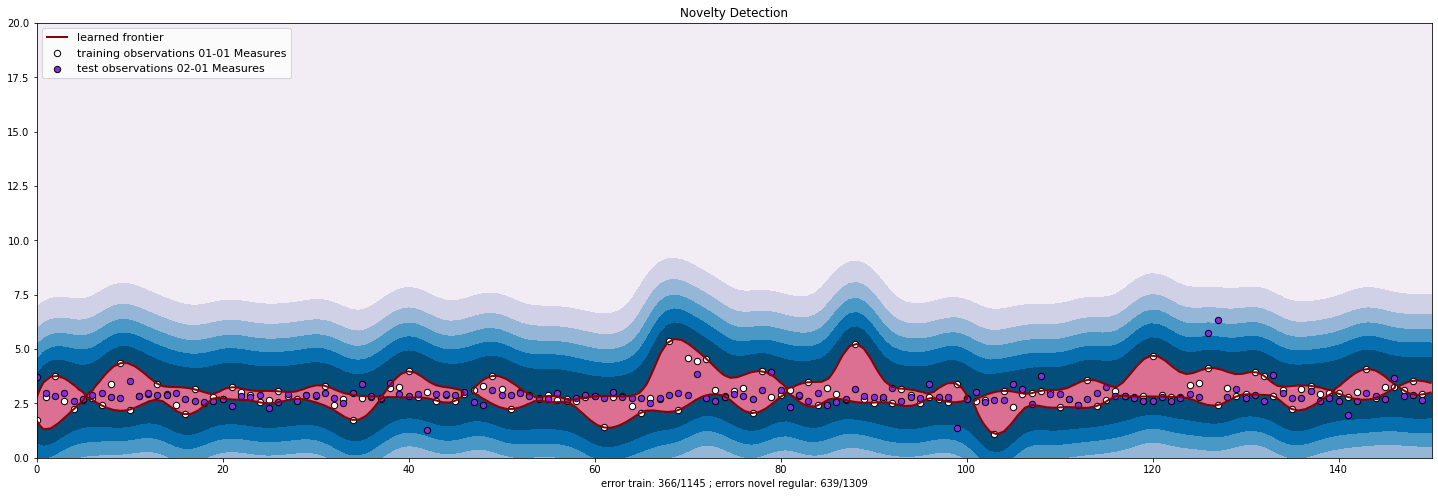

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(0, 150, 200), np.linspace(0, 20, 200))

X_train = [x for x in X if x.day == 1]
X_test = [x for x in X if x.day == 2]

train = np.array([[i,y] for i, (x,y) in enumerate(zip(X_train,y[:len(X_train)]))])
test = np.array([[i,y] for i, (x,y) in enumerate(zip(X_test,y[len(X_train):len(X_train) + len(X_test)]))])

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(train)
y_pred_train = clf.predict(train)
y_pred_test = clf.predict(test)

n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(25,8))
plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 40
b1 = plt.scatter(train[:150, 0], train[:150, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(test[:150, 0], test[:150, 1], c="blueviolet", s=s, edgecolors="k")
plt.axis("tight")
plt.legend(
    [a.collections[0], b1, b2],
    [
        "learned frontier",
        "training observations 01-01 Measures",
        "test observations 02-01 Measures"
    ],
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.xlabel(
    "error train: %d/%d ; errors novel regular: %d/%d"
    % (n_error_train,len(train[:,0]), n_error_test, len(test[:,0]))
)
plt.show()